In [361]:
exec(open("cleanup.py").read())

In [362]:
import json
from collections import defaultdict
import pandas as pd

def get_response(fname):
    with open(fname, 'r') as f:
        data = f.read()

    response = json.loads(data)

    surv_resp = defaultdict(dict)
    pass_resp = defaultdict(str)
    time_resp = defaultdict(str)

    for k, v in response.items():
        if 'response' in k:
            temp = k.split("_")
            pid = temp[0].strip('p')
            v = json.loads(v)
            surv_resp[pid].update(v)
        elif 'time' in k:
            temp = k.split("_")
            pid = temp[0]
            time_resp[pid] = float(v)
        elif 'password' in k:
            pass_resp[k] = v

    return (pass_resp, time_resp, surv_resp)

In [363]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [364]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []

}

In [365]:
questions = {}
for page_id in [3, 7, 8, 12, 14]:
    page_name = page_map.get(str(page_id))
    question_file = f'{page_name}.json'

    with open(f'questions/{question_file}', 'r') as f:
        questions[str(page_id)] = json.loads(f.read())

def get_qdetails(pid, qsid):
    pid = str(pid)
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text

In [366]:
import os
fpath = './responses'
password_response = []
time_response = []
survey_response = []
for i, fname in enumerate(os.listdir(fpath)):
    pss, tim, sur = get_response(os.path.join(fpath, fname))
    password_response.append(pss)
    time_response.append(tim)
    survey_response.append(sur)

In [367]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password1,password2
0,p0tato123,P0taten123!
1,passingclouds,passingclouds
2,wiaZKRUAaEs8U2zn,YsRwm2wzonvh4oAa
3,kobatohasegawa,KobatoHasegawa924
4,8989,8989
5,VivoBook1968,VivoBook1968
6,dAshiNg432,432dAshiNg432
7,Bighulais#1,Bighulais#1
8,Majic@456,Majic@456
9,S1ster87!,S1ster87!


In [368]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpass,fcog,fpasssurvey,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,7.372,33.481,40.460,20.261,10.223,8.759,27.234,55.492,261.447,14.435,34.680,14.859,18.228,11.479,57.530,10.265667
1,6.683,37.997,147.867,25.163,19.355,7.762,39.162,82.507,107.635,10.547,24.772,12.170,22.364,16.717,49.516,10.170283
2,42.389,49.202,14.825,49.321,12.559,14.486,52.395,74.865,205.422,13.101,23.916,8.315,30.411,12.394,41.841,10.757367
3,6.767,36.306,18.475,35.864,12.387,11.668,39.026,47.042,159.683,14.717,24.169,14.297,23.643,11.720,55.534,8.521633
4,14.569,149.773,47.463,47.241,68.721,20.503,17.572,94.074,105.875,20.193,14.363,24.043,21.694,17.183,73.928,12.286583
5,3.298,69.845,14.043,39.816,14.275,5.905,22.163,53.039,131.643,9.726,20.780,9.444,23.251,14.884,61.527,8.227317
6,4.686,88.343,30.275,24.176,16.795,21.869,40.881,67.452,140.099,23.156,31.384,27.152,38.008,24.461,35.890,10.243783
7,3.308,39.036,37.693,35.079,11.956,4.139,20.266,45.554,125.934,9.552,25.341,18.969,13.903,11.623,35.289,7.294033
8,4.410,15.659,33.996,31.858,11.900,2.979,8.667,32.532,79.093,6.149,8.599,24.214,30.677,6.750,42.153,5.660600
9,9.166,88.013,51.610,26.139,15.121,9.491,25.885,69.568,181.378,14.824,21.096,27.438,39.304,10.294,50.487,10.663567


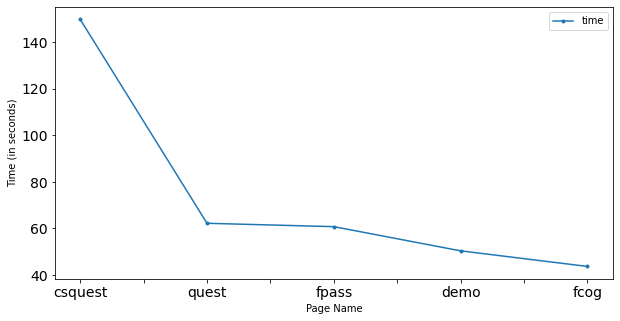

In [369]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [370]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,7,14,12,3
0,"{'5-1': '3', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-14': '7', '1-13': '5', '1-16': '6', '1-15'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...","{'1-1': '7', '2-1': '7', '3-1': '5', '3-2': '1...","{'1-1': '5', '2-1': '7', '2-2': '2', '2-3': '2..."
1,"{'5-1': '7', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-12': '4', '1-13': '5', '1-15': '4', '1-16'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'...","{'1-1': '6', '2-1': '5', '3-1': '3', '3-2': '2...","{'1-1': '6', '2-1': '5', '2-2': '6', '2-3': '5..."
2,"{'1-3': '3', '1-5': '6', '1-6': '3', '1-8': '3...","{'1-8': '4', '1-1': '7', '1-6': '7', '1-4': '1...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...","{'1-1': '7', '2-1': '7', '2-2': '1', '2-3': '7...","{'1-1': '7', '2-1': '7', '2-2': '1', '2-3': '1..."
3,"{'5-1': '4', '6-1': '1', '7-1': '7', '8-1': ['...","{'1-17': '7', '1-11': '7', '1-14': '7', '1-15'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '5', '2-1': '6', '2-2': '3', '2-3': '2..."
4,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-16': '6', '1-14': '6', '1-13': '6', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...","{'1-1': '7', '2-1': '7', '2-2': '2', '2-3': '7...","{'1-1': '7', '2-1': '6', '2-2': '2', '2-3': '5..."
5,"{'6-1': '1', '8-1': ['Social Media', 'Email', ...","{'1-15': '6', '1-17': '6', '1-14': '7', '1-12'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-...","{'1-1': '3', '2-1': '2', '2-2': '4', '2-3': '1...","{'1-1': '4', '2-1': '2', '2-2': '5', '2-3': '1..."
6,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-14': '6', '1-16': '6', '1-12': '6', '1-17'...","{'1-1': 'Woman', '2-1': '35-39 years old', '3-...","{'1-1': '4', '2-1': '6', '3-1': '2', '3-2': '4...","{'1-1': '2', '2-1': '7', '2-2': '7', '2-3': '6..."
7,"{'1-3': '3', '1-6': '6', '1-4': '4', '1-2': '5...","{'1-6': '7', '1-4': '2', '1-10': '6', '1-8': '...","{'1-1': 'Man', '2-1': '40-44 years old', '3-1'...","{'1-1': '7', '2-1': '4', '2-2': '1', '2-3': '1...","{'1-1': '7', '2-1': '5', '2-2': '1', '2-3': '1..."
8,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-12': '4', '1-16': '5', '1-14': '5', '1-15'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...","{'1-1': '6', '2-1': '5', '2-2': '3', '2-3': '7...","{'1-1': '6', '2-1': '5', '2-2': '7', '2-3': '6..."
9,"{'1-5': '5', '1-3': '3', '1-7': '5', '1-1': '4...","{'1-4': '5', '1-1': '5', '1-10': '5', '1-8': '...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'...","{'1-1': '5', '2-1': '4', '3-1': '6', '3-2': '3...","{'1-1': '5', '2-1': '2', '2-2': '6', '2-3': '6..."


### Attention Check

In [371]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   }
}

In [372]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [373]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

print(attentive_participants)

defaultdict(<function <lambda> at 0x7fd149e619d0>, {'0': True, '1': True, '2': True, '3': True, '4': False, '5': True, '6': True, '7': True, '8': True, '9': True})


In [374]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive

,attentive
0,True
1,True
2,True
3,True
4,False
5,True
6,True
7,True
8,True
9,True


### First Password Survey Analysis

In [375]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,The password I have created is:,"[{'sid': 1, 'type': 'likert', 'title': '', 'el..."
1,2,The password I have created:,"[{'sid': 1, 'type': 'likert', 'title': 'is har..."
2,3,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [376]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,5,6,7,5,7,4,2,7,6,5
2-1,7,5,7,6,6,2,7,5,5,2
2-2,2,6,1,3,2,5,7,1,7,6
2-3,2,5,1,2,5,1,6,1,6,6
2-4,7,5,NaN,7,NaN,NaN,2,NaN,NaN,2
3-1,NaN,NaN,3,NaN,3,6,NaN,6,5,NaN
3-2,NaN,NaN,7,NaN,3,6,NaN,6,5,NaN
3-3,NaN,NaN,7,NaN,3,5,NaN,4,7,NaN
3-4,NaN,NaN,3,NaN,3,5,NaN,2,6,NaN


In [377]:
get_qdetails('3', '1-1')

"The password I have created is: \n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Weak', 'high': 'Strong'}}"

In [378]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

In [397]:
# quest
import json
quest = pd.DataFrame(survey_response_df['7'].to_dict())
for qsid in quest.index:
    # print(qsid)
    # print(get_qdetails('7', qsid).strip())
    print(json.loads(get_qdetails('7', qsid).strip()).get('sid'))


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [395]:
json.load()

TypeError: load() missing 1 required positional argument: 'fp'

In [380]:
# csquest
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9
5-1,3,7,1,4,6,NaN,6,4,5,4
6-1,1,1,1,1,1,1,1,1,1,1
7-1,6,5,1,7,6,NaN,6,4,5,5
8-1,"[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Gaming Websites]","[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Cour...",[Social Media],"[Social Media, Email, Financial Websites, E-co...",[None of the above],"[Email, Financial Websites]","[Social Media, Email, Financial Websites]","[Social Media, Course Management Websites, e.g..."
2-1,6,6,6,6,6,6,6,6,6,6
3-1,6,6,1,1,5,2,3,1,5,3
3-2,7,7,1,7,6,5,6,6,7,5
3-3,5,7,1,5,5,4,4,2,6,2
3-4,5,6,1,5,5,4,4,2,4,2
4-1,7,5,5,7,6,6,7,7,6,3


In [381]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,7,6,7,6,7,3,4,7,6,5
2-1,7,5,7,6,7,2,6,4,5,4
3-1,5,3,2,1,2,2,2,2,2,6
3-2,1,2,NaN,1,NaN,NaN,4,NaN,NaN,3
3-3,1,2,NaN,1,NaN,NaN,1,NaN,NaN,1
3-4,7,5,NaN,6,NaN,NaN,1,NaN,NaN,2
4-1,2,2,NaN,2,NaN,NaN,2,NaN,NaN,2
2-2,NaN,NaN,1,NaN,2,4,NaN,1,3,NaN
2-3,NaN,NaN,7,NaN,7,1,NaN,1,7,NaN


In [382]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,Man,Man,Man,Man,Man,Woman,Woman,Man,Man,Man
2-1,30-34 years old,18-24 years old,25-29 years old,25-29 years old,30-34 years old,50-54 years old,35-39 years old,40-44 years old,35-39 years old,55-59 years old
3-1,[White],[White],[White],[White],[White],[White],[White],[Asian],[White],[White]
4-1,High School Graduate,Four-year College Degree,High School Graduate,High School Graduate,Four-year College Degree,Four-year College Degree,Graduate degree (MS/Doctorate),Graduate degree (MS/Doctorate),Four-year College Degree,Four-year College Degree
5-1,Education,Business,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...","Economics, Humanities and Social Sciences",I prefer not to answer,"Computer Science/Engineering, and Information ...","Economics, Humanities and Social Sciences",Other areas of Engineering
6-1,Non-profit organization,Business or industry,Business or industry,Student,I prefer not to answer,Non-profit organization,I prefer not to answer,Business or industry,Business or industry,Business or industry
7-1,No experience,Pursuing or completed a degree,Self-taught,Pursuing or completed a degree,Pursuing or completed a degree,Pursuing or completed a degree,I prefer not to answer,Pursuing or completed a degree,Self-taught,Self-taught
8-1,No experience,No experience,Self-taught,No experience,Pursuing or completed a degree,Self-taught,I prefer not to answer,Self-taught,Self-taught,Self-taught
